In [282]:
#import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram




<table>
  <tr>
    <th>Variable</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>respondent_id</td>
    <td>An identifier for our observations</td>
  </tr>
  <tr>
    <td>variety_of_choice</td>
    <td>Importance of this attribute on a 0-10 scale</td>
  </tr>
  <tr>
    <td>electronics</td>
    <td>Importance of this attribute on a 0-10 scale</td>
  </tr>
  <tr>
    <td>furniture</td>
    <td>Importance of this attribute on a 0-10 scale</td>
  </tr>
  <tr>
    <td>quality_of_service</td>
    <td>Importance of this attribute on a 0-10 scale</td>
  </tr>
  <tr>
    <td>low_prices</td>
    <td>Importance of this attribute on a 0-10 scale</td>
  </tr>
  <tr>
    <td>return_policy</td>
    <td>Importance of this attribute on a 0-10 scale</td>
  </tr>
  <tr>
    <td>professional</td>
    <td>Whether the respondent is a professional or not (e.g., student)</td>
  </tr>
  <tr>
    <td>income</td>
    <td>Gross annual income expressed in thousands of pound sterling</td>
  </tr>
  <tr>
    <td>age</td>
    <td>Respondents’ age in years</td>
</table>


In [3]:
# Load your dataset into a DataFrame
df = pd.read_csv("data/office.csv")

# Print the number of rows and columns
print("Number of rows and columns:", df.shape)

# Print out the first five rows
df.head()

Number of rows and columns: (200, 10)


,respondent_id,variety_of_choice,electronics,furniture,quality_of_service,low_prices,return_policy,professional,income,age
0,1,8,3,6,3,2,2,non-professional,16,28
1,2,6,3,1,4,7,1,non-professional,22,27
2,3,6,1,2,4,9,6,non-professional,18,22
3,4,8,3,3,4,8,7,non-professional,18,29
4,5,4,6,3,4,2,5,professional,35,51


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   respondent_id       200 non-null    int64 
 1   variety_of_choice   200 non-null    int64 
 2   electronics         200 non-null    int64 
 3   furniture           200 non-null    int64 
 4   quality_of_service  200 non-null    int64 
 5   low_prices          200 non-null    int64 
 6   return_policy       200 non-null    int64 
 7   professional        200 non-null    object
 8   income              200 non-null    int64 
 9   age                 200 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 15.8+ KB


In [5]:
#Checking for missing values
df.isna().sum()

respondent_id         0
variety_of_choice     0
electronics           0
furniture             0
quality_of_service    0
low_prices            0
return_policy         0
professional          0
income                0
age                   0
dtype: int64

In [6]:
#Descriptive Statistics
df.describe()

,respondent_id,variety_of_choice,electronics,furniture,quality_of_service,low_prices,return_policy,income,age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,100.500000,7.565000,4.450000,3.270000,3.530000,4.79500,4.250000,32.170000,32.515000
std,57.879185,2.011468,1.943292,2.373874,2.316448,2.53081,2.049022,22.695961,11.884696
min,1.000000,4.000000,1.000000,0.000000,1.000000,1.00000,1.000000,13.000000,21.000000
25%,50.750000,6.000000,3.000000,1.000000,2.000000,2.00000,3.000000,15.000000,24.000000
50%,100.500000,8.000000,4.500000,2.000000,3.000000,5.00000,4.000000,19.500000,27.000000
75%,150.250000,10.000000,6.000000,6.000000,4.000000,7.00000,6.000000,54.250000,38.000000
max,200.000000,10.000000,10.000000,7.000000,9.000000,10.00000,10.000000,95.000000,68.000000


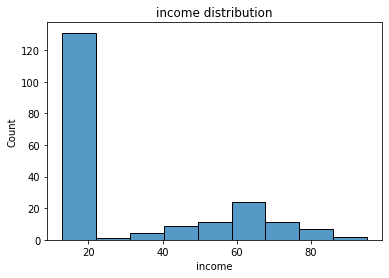

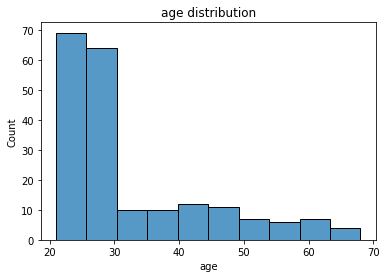

In [227]:

non_att = df[[ 'income', 'age']]
for feature in non_att:
    sns.histplot(non_att[feature]) #Checking the distributions of the interactions
    plt.title(feature + ' distribution')
    plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_19680\2892854639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_att['professional'] = a


Text(0.5, 1.0, 'Univariate Analysis of Age and Income')

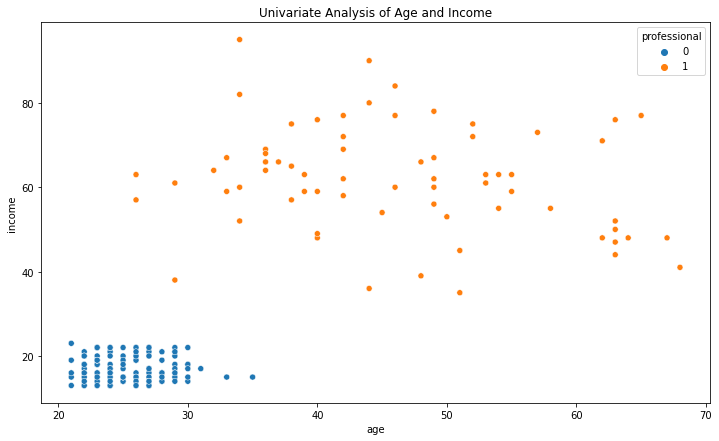

In [226]:
x = df['professional']
one_hot = pd.get_dummies(x)
non_att['professional'] = one_hot['professional']

plt.figure(figsize=(12,7))
sns.scatterplot(x='age', y='income', hue='professional', data = non_att)
plt.title('Univariate Analysis of Age and Income')

There seems to be two differenciable clusters on the basis of the two variables above.
<li>Younger customers agesd 21-34 earning between 13 to 38 thousand British Pounds Sterling</li>
<li>Customers aged 40 and above earning as high as 95 thousnd British Pounds Sterling</li>

In [143]:
#Attitudinal Variables
attitudinal = df[[ 'variety_of_choice', 'electronics', 'furniture','quality_of_service', 'low_prices', 'return_policy']]

attitudinal


#for feature in attitudinal:
 #   sns.histplot(attitudinal[feature]) #Checking the distributions of the interactions
  #  plt.show()

,variety_of_choice,electronics,furniture,quality_of_service,low_prices,return_policy
0,8,3,6,3,2,2
1,6,3,1,4,7,1
2,6,1,2,4,9,6
3,8,3,3,4,8,7
4,4,6,3,4,2,5
...,...,...,...,...,...,...
195,6,5,2,3,3,6
196,7,3,0,2,7,6
197,9,1,7,4,5,2
198,10,6,7,4,4,3


In [8]:
#Z-Score Standardadisation


z_score_att = attitudinal.apply(stats.zscore)

z_score_att

,variety_of_choice,electronics,furniture,quality_of_service,low_prices,return_policy
0,0.216803,-0.748029,1.152905,-0.229373,-1.107161,-1.100840
1,-0.779991,-0.748029,-0.958643,0.203406,0.873449,-1.590103
2,-0.779991,-1.779793,-0.536333,0.203406,1.665693,0.856209
3,0.216803,-0.748029,-0.114024,0.203406,1.269571,1.345471
4,-1.776785,0.799617,-0.114024,0.203406,-1.107161,0.366947
...,...,...,...,...,...,...
195,-0.779991,0.283735,-0.536333,-0.229373,-0.711039,0.856209
196,-0.281594,-0.748029,-1.380952,-0.662152,0.873449,0.856209
197,0.715199,-1.779793,1.575214,0.203406,0.081205,-1.100840
198,1.213596,0.799617,1.575214,0.203406,-0.314917,-0.611578


In [232]:
att = z_score_att

After normalizing, lets see which variable has the smallest minimum value and which variable has the largest maximum values

In [233]:
min_values = z_score_att.min(axis=0)
print(min_values.sort_values())


electronics          -1.779793
variety_of_choice    -1.776785
return_policy        -1.590103
low_prices           -1.503283
furniture            -1.380952
quality_of_service   -1.094930
cluster_4             0.000000
cluster_3             1.000000
dtype: float64


In [234]:
max_values = z_score_att.max(axis=0)
print(max_values.sort_values())

variety_of_choice     1.213596
furniture             1.575214
low_prices            2.061815
quality_of_service    2.367300
return_policy         2.813258
electronics           2.863146
cluster_3             3.000000
cluster_4             3.000000
dtype: float64


We can see that the "electronics" variable has the lowest minimum value and the highest maximum value in the normalized dataset. 

<h5>Finding the Right Number of Clusters</h5>
Start by a clustering algorithm (K-Means) to determine the optimal number of clusters for the data. One method is the "elbow" method, where you plot the within-cluster sum of squares (WCSS) against the number of clusters and look for the "elbow" point where the reduction in WCSS begins to level off. 

<h3>Comparing Clustering Methods</h3>
 Now that we have prepared our data for clustering, we will be implementing it with Hierarchical Clustering and the K-means Clustering algorithms. 


 <h5>Hierarchical Clustering</h5>
We now perform heirarchical clustering on the standardised attitudinal variables using the method "ward" which  and plot a dendogram

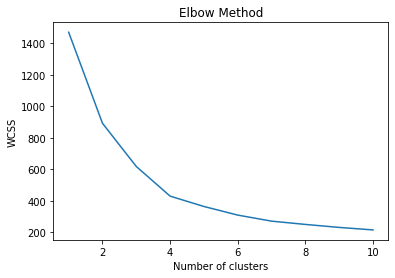

In [235]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(z_score_att)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The elbow point curve is fairly smooth and there is no clear elbow point, it can be difficult to determine the optimal number of clusters using the elbow method alone


Suppose that after looking at the dendrogram and discussing with the
marketing department, we decide to proceed with a 6-cluster solution.
Let's create an hierarchical clustering algorithm on the normalized dataset and plot the dendogram

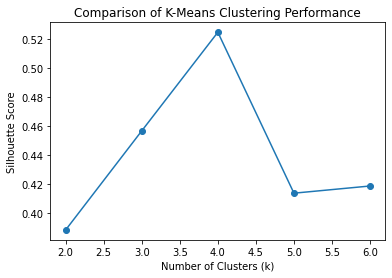

In [236]:

# Define the range of k values to evaluate
k_values = range(2, 7)

# Evaluate the silhouette score for each k value
silhouette_scores = []
for k in k_values:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(att)
    score = silhouette_score(att, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for each k value
plt.plot(k_values, silhouette_scores, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Comparison of K-Means Clustering Performance')
plt.show()

Comparing the 3 and 4 cluster solutions, it was observed that cluster 1 and 2 had the same members whike the third and fourth clusters are merged in the 3 cluster solution. I'll be going for the three cluster solution

3 cluster -> [94,60,46]
4 cluster -> [94,60, 29,17]


<h3>Hierarchical Clustering</h3>

In [255]:

Z = linkage(z_score_att, method='ward')



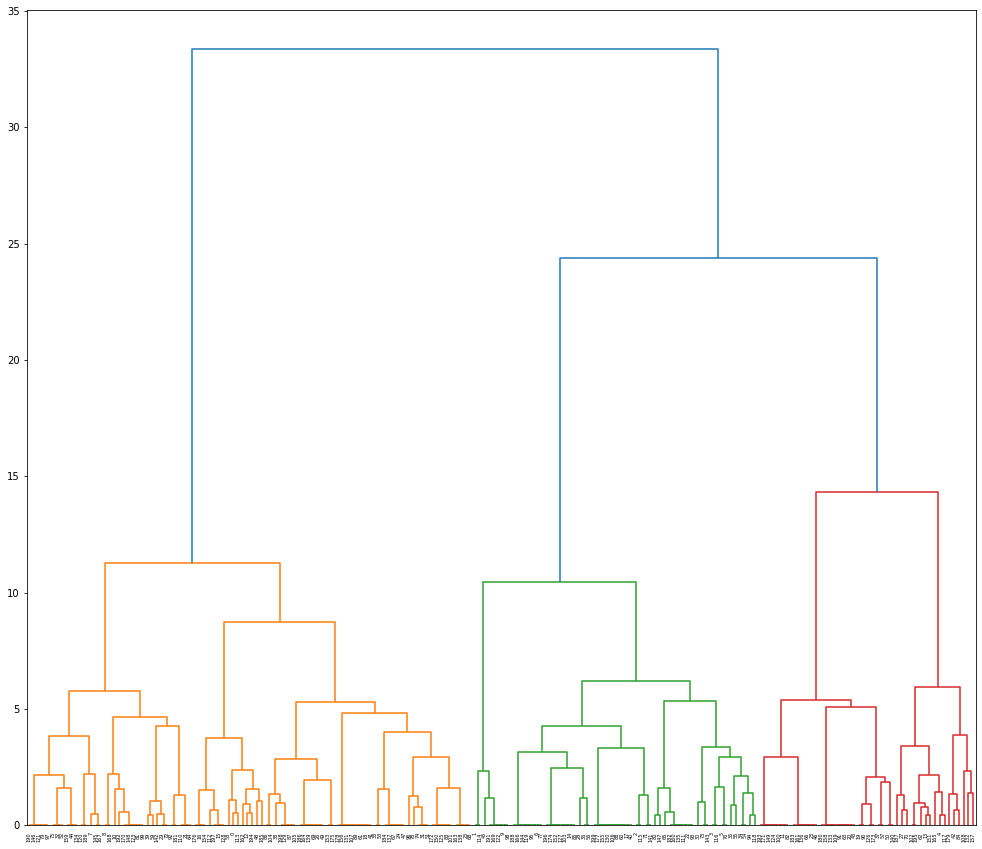

In [256]:
fig, ax = plt.subplots(figsize=(17, 15))
dendrogram(Z)
plt.show()



<li>The height at which entities merge represent the level of similarity between them. To return the cluster labels for each observation based on a given distance threshold, use the fcluster() function on the linkage matrix.</li>

<li> From the dendogram, we can see the natural clusters as well as the outliers by cutting the graph at a height that seperates the entities into distinct groups.</li>
<li> Asses the levels of similarity through the branches of the dendogram. At 15 as the heights(distance threshold), we have  the most natural clusters</li>

<li> At that distance, we have 3 clusters

<h5>Cophetic Correlation Coefficient </h5>
This compares how well a dendrogram (a tree diagram showing the hierarchical clustering of data) preserves the pairwise distances between the original data points. 0.84 indicates that the dendogram preserves the pair wise distances between the data points to a high degree

In [239]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet

distances = pdist(z_score_att)

c, coph_dists = cophenet(Z, distances)
print(c)

0.8365165679892046


In [257]:
t = 15     #3 cluster solution

cluster_3 = fcluster(Z, t=t, criterion='distance')

#Number of observasions in each cluster
cluster_count = pd.Series(cluster_3).value_counts()
cluster_count




1    94
2    60
3    46
dtype: int64

<h3>K-Means Clustering</h3>
The highest silhouette score is around 4 clusters. Now that we know that, lets try a K means approach to see the number of observations in each cluster :

In [296]:
from sklearn.cluster import KMeans

# Create a KMeans object with 6 clusters
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the KMeans model to the data
kmeans.fit(z_score_att)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Count the number of observations assigned to each cluster
counts = pd.Series(labels).value_counts()

# Print the counts for each cluster

print(counts)



0    94
1    60
2    29
3    17
dtype: int64


<h5>Segementation Plot of the mean each of the attitudinal variables per cluster</h5>

In [287]:
att['cluster_3'] = cluster_3

# Create a list of unique cluster labels
cluster_labels = att['cluster_3'].unique()
cluster_labels
att.drop('cluster_4', inplace=True, axis=1)

           variety_of_choice  electronics  furniture  quality_of_service  \
cluster_3                                                                  
1                   0.810637     0.437402   0.901316           -0.519427   
2                  -0.323127    -0.799617  -0.874181           -0.200521   
3                  -1.235049     0.149157  -0.701585            1.322986   

           low_prices  return_policy  
cluster_3                             
1           -0.378128      -0.595963  
2            1.328989       0.725739  
3           -0.960768       0.271222  


Text(0.5, 1.0, 'Variable inportance by Cluster Distribution')

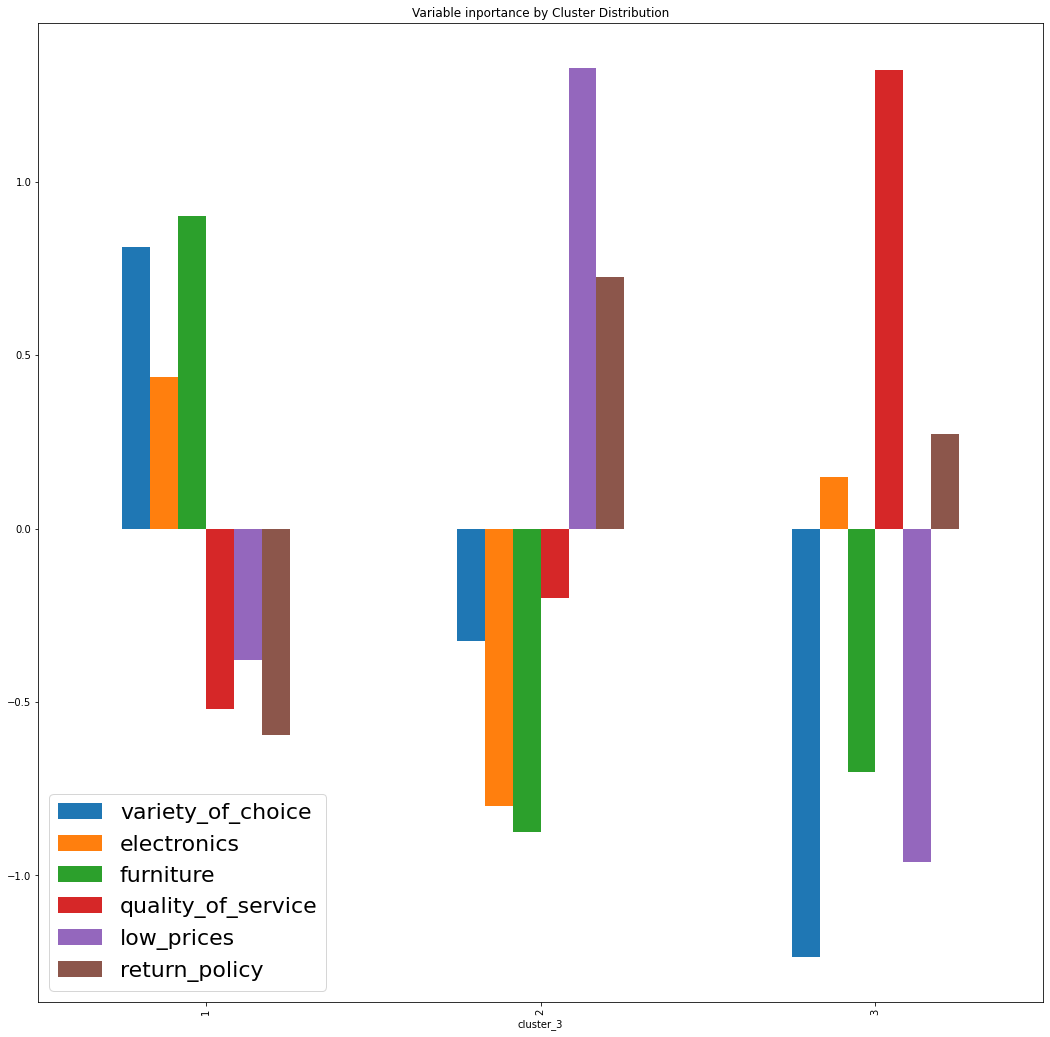

In [288]:
# Group the data by cluster label and calculate the means of each variable within each cluster
means = att.groupby('cluster_3').mean()

# Print the means for each attitudinal variable per cluster
print(means)

fig, ax = plt.subplots(figsize=(18, 18))
means.plot(kind='bar', ax=ax)
ax.legend(fontsize=22)
plt.title('Variable inportance by Cluster Distribution')

<h3>How to target each cluster of customers</h3>

<li>Cluster 1</li>
The members of this cluster value high quality electronics, good furniture and the availability of options when shopping for office equipment. Stay up to date with the latest technologies in office equipments and update inventory when needed.





<l1>Cluster 2 </li>
The members are very particular about low prices and a return policy. This group will benefit from discounted offers as well as a reasonale return and refund policy if possible. Create a system whereby customers can sign up and recieve points that add up to store credit or a discount




<li>Cluster 3</li>
The members of this group value quality of service significantly over other factors therefore the store has to improve its customer services by training agents as well as improving the overall ambience of the store.

Text(0.5, 1.0, 'Variable inportance by Cluster Distribution')

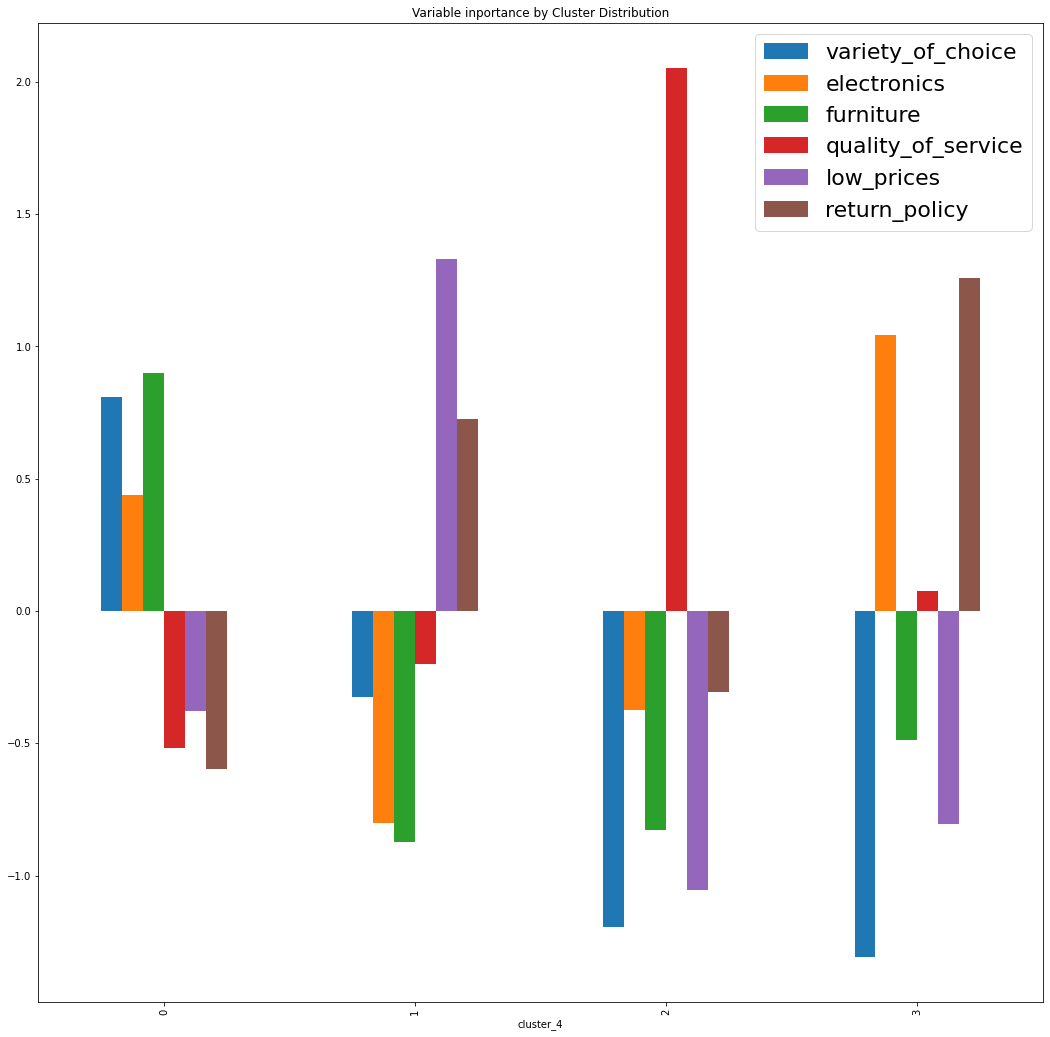

In [299]:
a = z_score_att
a['cluster_4'] = kmeans.labels_

# Group the data by cluster label and calculate the means of each variable within each cluster
meanz = a.groupby('cluster_4').mean()

fig1, ax = plt.subplots(figsize=(18, 18))
meanz.plot(kind='bar', ax=ax)
ax.legend(fontsize=22)
plt.title('Variable inportance by Cluster Distribution')

<li>Cluster 4</li>
In the 4-cluster solution, the first and second clusters are identical as the 3-cluster solution. However, the third cluster is further decomposed into two clusters in this case. While the main target of the third cluster remains the quality of service, the fourth cluster can be targeted through availability of electronics and a good return policy

In [300]:
from sklearn.cluster import KMeans

# Create a KMeans object with 6 clusters
kmeans1 = KMeans(n_clusters=3, random_state=0)

# Fit the KMeans model to the data
kmeans1.fit(z_score_att)

# Get the cluster labels for each data point
labelss = kmeans1.labels_

# Count the number of observations assigned to each cluster
counts = pd.Series(labelss).value_counts()

# Print the counts for each cluster

print(counts)


0    94
1    60
2    46
dtype: int64


Hit Rate of Hierarchical and K means Clustering

We can see the hit rate is 100% when using both algorithms

In [307]:
#Hit Rate of Hierarchical and K means Clustering
cluster_3

array([1, 2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 3, 1,
       2, 3, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 3, 3,
       1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 3, 3, 1, 2,
       3, 1, 1, 1, 3, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 3, 2, 1, 1,
       2, 1, 3, 3, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 3,
       1, 2, 1, 1, 2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 3, 1, 3, 2, 1, 1, 2, 1,
       3, 3, 1, 2, 3, 1, 1, 1, 3, 2, 1, 2, 2, 1, 1, 2, 1, 3, 1, 3, 2, 1,
       1, 2, 1, 3, 3, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 1, 3, 1, 3, 2, 1,
       1, 2, 1, 3, 3, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 1, 3, 1, 3, 2, 1,
       1, 2], dtype=int32)

In [321]:
cluster_3_k = []
for i in  labelss:
    cluster_3_k.append(i+1)
    

In [322]:
cluster_3_k == cluster_3

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [323]:
df

,respondent_id,variety_of_choice,electronics,furniture,quality_of_service,low_prices,return_policy,professional,income,age,labels
0,1,8,3,6,3,2,2,non-professional,16,28,3
1,2,6,3,1,4,7,1,non-professional,22,27,1
2,3,6,1,2,4,9,6,non-professional,18,22,1
3,4,8,3,3,4,8,7,non-professional,18,29,1
4,5,4,6,3,4,2,5,professional,35,51,4
...,...,...,...,...,...,...,...,...,...,...,...
195,196,6,5,2,3,3,6,professional,77,42,4
196,197,7,3,0,2,7,6,professional,60,34,1
197,198,9,1,7,4,5,2,non-professional,14,24,3
198,199,10,6,7,4,4,3,non-professional,14,27,3
